In [1]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns

from tsfresh import extract_features
from tsfresh.utilities.dataframe_functions import make_forecasting_frame
from sklearn.ensemble import AdaBoostRegressor
from tsfresh.utilities.dataframe_functions import impute

import pandas_datareader.data as web
import datetime

import warnings
warnings.filterwarnings('ignore')

/Users/mchrist/Documents/Research/tsfresh/venv/lib/python2.7/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


# Collect the data for the google stock 

In [2]:
start = datetime.datetime(2016, 1, 1)
end = datetime.datetime(2017, 1, 1)
x = web.DataReader("F", 'google', start, end)
x.head()

,Open,High,Low,Close,Volume
Date,,,,,
2016-01-04,13.87,14.00,13.75,13.97,38525811
2016-01-05,13.97,14.00,13.51,13.72,50267536
2016-01-06,13.56,13.56,13.05,13.11,61285453
2016-01-07,12.90,13.04,12.60,12.70,57846688
2016-01-08,13.05,13.10,12.50,12.54,46199413


In [3]:
x.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 252 entries, 2016-01-04 to 2016-12-30
Data columns (total 5 columns):
Open      252 non-null float64
High      252 non-null float64
Low       252 non-null float64
Close     252 non-null float64
Volume    252 non-null int64
dtypes: float64(4), int64(1)
memory usage: 11.8 KB


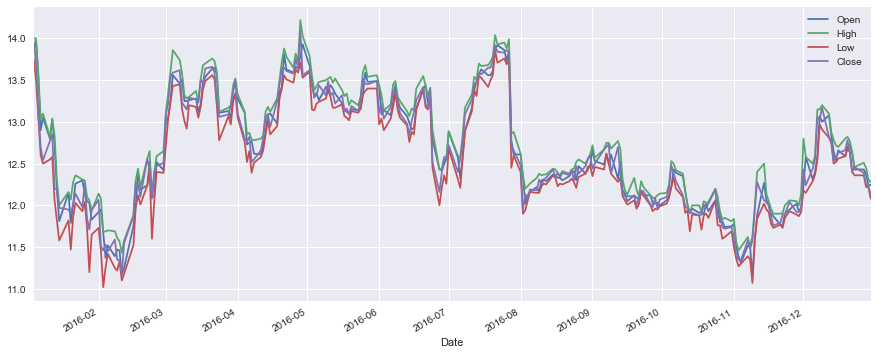

In [4]:
x.drop("Volume", axis=1).plot(figsize=(15, 6))
plt.show()

So, we loaded the google stock for one year. Now, we want to predict the High column.

# Create forecasting frame

In [5]:
df_shift, y = make_forecasting_frame(x["High"], kind="price", max_timeshift=10, rolling_direction=1)

In [6]:
df_shift.head()

,time,val,id,kind
2214,2016-01-04,14.0,2016-01-05,price
1964,2016-01-04,14.0,2016-01-06,price
2215,2016-01-05,14.0,2016-01-06,price
1715,2016-01-04,14.0,2016-01-07,price
1965,2016-01-05,14.0,2016-01-07,price


`df_shift` is ready to be passed into the feature extraction process in tsfresh 

In [7]:
X = extract_features(df_shift, column_id="id", column_sort="time", column_value="val", impute_function=impute, 
                     show_warnings=False)

Feature Extraction: 100%|██████████| 251/251 [00:08<00:00, 30.12it/s]
 'feature__agg_linear_trend__f_agg_"max"__chunk_len_10__attr_"rvalue"'
 'feature__agg_linear_trend__f_agg_"max"__chunk_len_10__attr_"slope"'
 'feature__agg_linear_trend__f_agg_"max"__chunk_len_10__attr_"stderr"'
 'feature__agg_linear_trend__f_agg_"max"__chunk_len_50__attr_"intercept"'
 'feature__agg_linear_trend__f_agg_"max"__chunk_len_50__attr_"rvalue"'
 'feature__agg_linear_trend__f_agg_"max"__chunk_len_50__attr_"slope"'
 'feature__agg_linear_trend__f_agg_"max"__chunk_len_50__attr_"stderr"'
 'feature__agg_linear_trend__f_agg_"mean"__chunk_len_10__attr_"intercept"'
 'feature__agg_linear_trend__f_agg_"mean"__chunk_len_10__attr_"rvalue"'
 'feature__agg_linear_trend__f_agg_"mean"__chunk_len_10__attr_"slope"'
 'feature__agg_linear_trend__f_agg_"mean"__chunk_len_10__attr_"stderr"'
 'feature__agg_linear_trend__f_agg_"mean"__chunk_len_50__attr_"intercept"'
 'feature__agg_linear_trend__f_agg_"mean"__chunk_len_50__attr_"rval

In [8]:
X.head()

variable,feature__abs_energy,feature__absolute_sum_of_changes,"feature__agg_autocorrelation__f_agg_""mean""","feature__agg_autocorrelation__f_agg_""median""","feature__agg_autocorrelation__f_agg_""var""","feature__agg_linear_trend__f_agg_""max""__chunk_len_10__attr_""intercept""","feature__agg_linear_trend__f_agg_""max""__chunk_len_10__attr_""rvalue""","feature__agg_linear_trend__f_agg_""max""__chunk_len_10__attr_""slope""","feature__agg_linear_trend__f_agg_""max""__chunk_len_10__attr_""stderr""","feature__agg_linear_trend__f_agg_""max""__chunk_len_50__attr_""intercept""",...,feature__time_reversal_asymmetry_statistic__lag_1,feature__time_reversal_asymmetry_statistic__lag_2,feature__time_reversal_asymmetry_statistic__lag_3,feature__value_count__value_-inf,feature__value_count__value_0,feature__value_count__value_1,feature__value_count__value_inf,feature__value_count__value_nan,feature__variance,feature__variance_larger_than_standard_deviation
id,,,,,,,,,,,,,,,,,,,,,
2016-01-05,196.0000,0.00,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
2016-01-06,392.0000,0.00,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
2016-01-07,575.8736,0.44,-0.625000,-0.625000,0.140625,0.0,0.0,0.0,0.0,0.0,...,-169.769600,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.043022,0.0
2016-01-08,745.9152,0.96,-0.612853,-0.783749,0.483390,0.0,0.0,0.0,0.0,0.0,...,-260.882752,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.156300,0.0
2016-01-11,917.5252,1.02,-0.558454,-0.804121,0.562130,0.0,0.0,0.0,0.0,0.0,...,-227.227616,-330.7284,0.0,0.0,0.0,0.0,0.0,0.0,0.173440,0.0


#  Fit Adaboost

In [9]:
ada = AdaBoostRegressor()

y_pred = [0] * len(y)
y_pred[0] = y.iloc[0]

for i in range(1, len(y)):
    ada.fit(X.iloc[:i], y[:i])
    y_pred[i] = ada.predict(X.iloc[i, :])
    
y_pred = pd.Series(data=y_pred, index=y.index)

In [10]:
y_pred = pd.Series(data=y_pred, index=y.index)

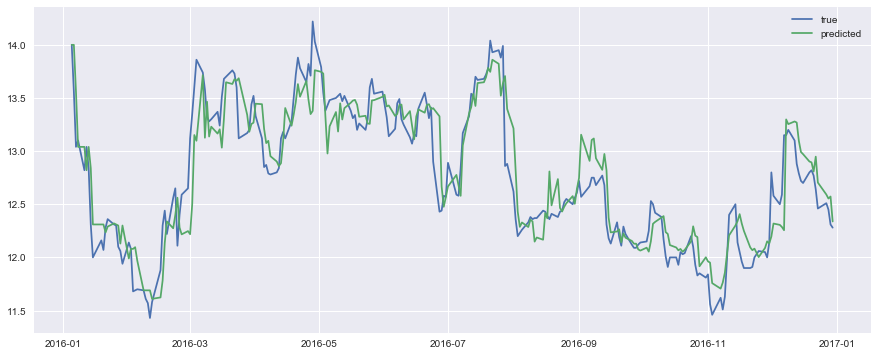

In [11]:
plt.figure(figsize=(15, 6))
plt.plot(y, label="true")
plt.plot(y_pred, label="predicted")
plt.legend()
plt.show()

Looks not to bad. The green curve is the output of the AdaBoost Regressor, the blue curve is the true High value.

We can also inspect the relevance of the extracted features

In [12]:
importances = pd.Series(index=X.columns, data=ada.feature_importances_)
importances.sort_values(ascending=False)

variable
feature__maximum                                                        0.214397
feature__quantile__q_0.1                                                0.132201
feature__change_quantiles__f_agg_"mean"__isabs_False__qh_1.0__ql_0.0    0.082137
feature__quantile__q_0.7                                                0.073310
feature__minimum                                                        0.051011
feature__change_quantiles__f_agg_"mean"__isabs_False__qh_0.4__ql_0.0    0.047883
feature__approximate_entropy__m_2__r_0.9                                0.033256
feature__quantile__q_0.8                                                0.033034
feature__change_quantiles__f_agg_"mean"__isabs_False__qh_1.0__ql_0.2    0.031080
feature__change_quantiles__f_agg_"mean"__isabs_False__qh_0.8__ql_0.0    0.030624
feature__first_location_of_minimum                                      0.025819
feature__change_quantiles__f_agg_"var"__isabs_True__qh_1.0__ql_0.0      0.019359
feature__time_rever

So, the minumum value "feature__maximum" during the last 10 values had the highest importance to predict next value of High column